<a href="https://colab.research.google.com/github/IntroductionToAICW/CW/blob/main/algorithms/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
from keras.utils.vis_utils import plot_model

from google.colab import drive
import twitterAPI

#Import dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#put the file path below
df = pd.read_pickle("/content/drive/My Drive/dataset/valid_df.pkl")
df.head(5)

,text,labels,lang,NoHTML_text,ASCII_NoHTML_text,Lemma_NoSal_ASCII_NoHTML_text,NoSW_Lemma_NoSal_ASCII_NoHTML_text,afterProcess
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,en,#FollowFriday @France_Inte @PKuchly57 @Milipol...,for being top engaged members in my community ...,for be top engage member in my community this ...,engage member community week,engage member community week
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,en,@Lamb2ja Hey James! How odd :/ Please call our...,hey james how odd please call our contact cent...,hey james how odd please call our contact cent...,hey james odd contact centre able assist thanks,hey james odd contact centre able assist thanks
2,@DespiteOfficial we had a listen last night :)...,1,en,@DespiteOfficial we had a listen last night :)...,we had a listen last night as you bleed is an ...,we have a listen last night a you bleed be an ...,listen night bleed amaze track scotland,listen night bleed amaze track scotland
3,@97sides CONGRATS :),1,es,@97sides CONGRATS :),congrats,congrats,congrats,congrats
4,yeaaaah yippppy!!! my accnt verified rqst has...,1,en,yeaaaah yippppy!!! my accnt verified rqst has...,yeaaaah yippppy my accnt verified rqst has suc...,yeaaaah yippppy my accnt verify rqst have succ...,yeaaaah yippppy accnt verify rqst succeed blue...,yeaaaah yippppy accnt verify rqst succeed blue...


In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['afterProcess'].values
X_test = test['afterProcess'].values
y_train = train['labels']
y_test = test['labels']

#Define the hyperparameters

In [5]:
nb_words = 10000  # the total number of words 
max_len = 24  # Maximum number of words in a sequence

#Preprocessing

In [6]:
#basic preprocessing filtering lowecasing and padding the sentences 
tk = Tokenizer(num_words=nb_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
tk.fit_on_texts(X_test)
X_train = tk.texts_to_sequences(X_train)
X_test = tk.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [7]:
X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 64], dtype=int32)

In [8]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train, y_train, test_size=0.1, random_state=37)

#Model 1: Embedding layer with LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                4800      
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 644,816
Trainable params: 644,816
Non-trainable params: 0
_________________________________________________________________


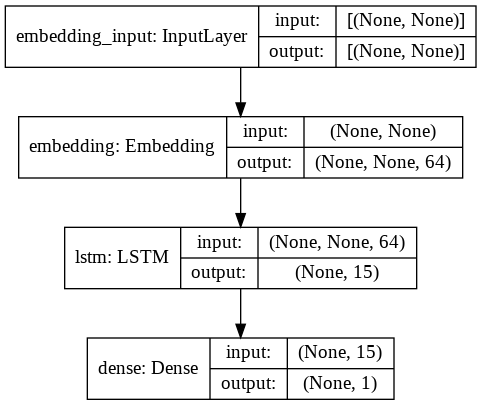

In [9]:
model = keras.Sequential()
model.add(keras.layers.Embedding(nb_words, 64))

model.add(layers.LSTM(15,dropout=0.5))
model.add(keras.layers.Dense(1, activation = "sigmoid")) 



model.compile(optimizer='adam',
              loss = "binary_crossentropy",
              metrics=['accuracy'])


model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [10]:
history = model.fit(X_train_emb, y_train_emb, epochs=40, batch_size = 52, validation_data=(X_valid_emb, y_valid_emb), verbose=1)

Epoch 1/40
137/137 [==============================] - 7s 29ms/step - loss: 0.6825 - accuracy: 0.5716 - val_loss: 0.5704 - val_accuracy: 0.7154
Epoch 2/40
137/137 [==============================] - 3s 19ms/step - loss: 0.4959 - accuracy: 0.7806 - val_loss: 0.5330 - val_accuracy: 0.7141
Epoch 3/40
137/137 [==============================] - 2s 18ms/step - loss: 0.3766 - accuracy: 0.8413 - val_loss: 0.5512 - val_accuracy: 0.7154
Epoch 4/40
137/137 [==============================] - 3s 19ms/step - loss: 0.3049 - accuracy: 0.8770 - val_loss: 0.5851 - val_accuracy: 0.7192
Epoch 5/40
137/137 [==============================] - 3s 19ms/step - loss: 0.2545 - accuracy: 0.9043 - val_loss: 0.6388 - val_accuracy: 0.7154
Epoch 6/40
137/137 [==============================] - 3s 19ms/step - loss: 0.2088 - accuracy: 0.9180 - val_loss: 0.6749 - val_accuracy: 0.7116
Epoch 7/40
137/137 [==============================] - 3s 20ms/step - loss: 0.1979 - accuracy: 0.9202 - val_loss: 0.7123 - val_accuracy: 0.6976

In [11]:
#function in tensorflow in order to save our model 
model.save("model.h5")

#Model2: Embedding layer with Bidirectional LSTM

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 40)            400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 409,801
Trainable params: 409,801
Non-trainable params: 0
_________________________________________________________________


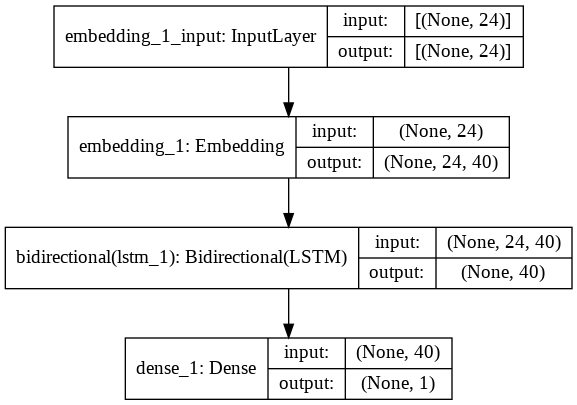

In [12]:
model2 = keras.Sequential()
model2.add(layers.Embedding(nb_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',
              loss = "binary_crossentropy",
              metrics=['accuracy'])
model2.summary()
plot_model(model2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [13]:
X_train_emb

array([[   0,    0,    0, ...,    0,   11, 1199],
       [   0,    0,    0, ...,   47,   14,    4],
       [   0,    0,    0, ...,    0,  526,   13],
       ...,
       [   0,    0,    0, ...,   15,    9, 2367],
       [   0,    0,    0, ...,    0,    0,  114],
       [   0,    0,    0, ...,    0,    0, 1189]], dtype=int32)

In [14]:
history = model2.fit(X_train_emb, y_train_emb, epochs=40, batch_size = 52, validation_data=(X_valid_emb, y_valid_emb), verbose=1)

Epoch 1/40
137/137 [==============================] - 8s 27ms/step - loss: 0.6869 - accuracy: 0.5473 - val_loss: 0.5883 - val_accuracy: 0.7039
Epoch 2/40
137/137 [==============================] - 3s 22ms/step - loss: 0.5498 - accuracy: 0.7247 - val_loss: 0.5325 - val_accuracy: 0.7230
Epoch 3/40
137/137 [==============================] - 3s 21ms/step - loss: 0.4282 - accuracy: 0.8099 - val_loss: 0.5171 - val_accuracy: 0.7395
Epoch 4/40
137/137 [==============================] - 3s 21ms/step - loss: 0.3556 - accuracy: 0.8529 - val_loss: 0.5543 - val_accuracy: 0.7332
Epoch 5/40
137/137 [==============================] - 3s 20ms/step - loss: 0.2784 - accuracy: 0.8896 - val_loss: 0.6340 - val_accuracy: 0.7205
Epoch 6/40
137/137 [==============================] - 3s 21ms/step - loss: 0.2443 - accuracy: 0.9058 - val_loss: 0.6217 - val_accuracy: 0.7103
Epoch 7/40
137/137 [==============================] - 3s 21ms/step - loss: 0.2129 - accuracy: 0.9172 - val_loss: 0.6964 - val_accuracy: 0.7039

In [15]:
model2.save("model2.h5")#extension for tensorflow 

In [16]:
results = model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 3ms/step - loss: 1.2775 - accuracy: 0.6889


In [17]:
results = model2.evaluate(X_test, y_test)

62/62 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.7011


#Connection and test with Twitter API

In [18]:
search_words = "#trump"
date_since = "2020-11-01"
number_of_tweets = 10
tweets = twitterAPI.main(search_words, date_since, number_of_tweets)

In [19]:
tweetsA = []
tweetsA = [tweet.text for tweet in tweets]
tweetsA.append("I love love love love")
tweetsA.append(" hate hate hate")

In [20]:
tweetsA

['RT @PutinIsAVirus: 14 innocents killed\n20 innocents wounded\nKids among both\n"The FBI investigation found that, of the 17 Iraqis killed by t…',
 'Even Trump would not suggest this! Could not make it up...\n\nPeople who arrived from Britain after December 11 shoul… https://t.co/xlaeMFglj6',
 'RT @Styx666Official: https://t.co/sxK31miu07\n\nTrump says he will not sign the covid stimulus without improvements. Congress goes bananas. H…',
 "@Reuters 1/ I think it's another #Trump delay tactic. If he can stretch it out till after Jan 5, he can see if he h… https://t.co/IfeURM22di",
 'RT @PutinIsAVirus: 14 innocents killed\n20 innocents wounded\nKids among both\n"The FBI investigation found that, of the 17 Iraqis killed by t…',
 'POTUS DO NOT Pardon these 2 Julian Assange and Edward Snowden #Trump',
 '. \n\n🐀🐀🐀\n\ntRump train wreck coming to a sewerage treatment facility near you...\n\n#TRUMP2020ToSaveAmerica #Trump \n\n https://t.co/twvYT5kwDq',
 '#Blackwater  killed many many people in 

In [21]:
tweetsA = tk.texts_to_sequences(tweetsA)
tweetsA = pad_sequences(tweetsA)

In [22]:
sentiment = ['Negative','Positive']

In [23]:
predict = model2.predict(tweetsA)

In [24]:
for y in predict:
  print(sentiment[int(np.around(y[-1], decimals=0))])

Negative
Negative
Negative
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Negative
